In [68]:
import numpy as np
import cv2
import imutils as im

import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline

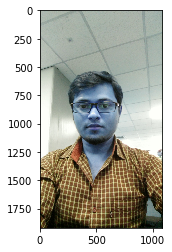

In [73]:
image= cv2.imread("/Users/sam/All-Program/App-DataSet/ImageProcessing/sam_1.jpg")
plt.imshow(np.array(image, dtype='uint8'))

## Resize:

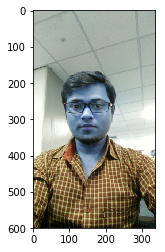

In [30]:
r = im.resize(image,height=600)
plt.imshow(r)

## Rotate:

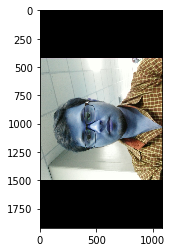

In [45]:
rot = im.rotate(image, angle=90)
plt.imshow(rot)

In [47]:
p = [i for i,j in enumerate(rot[:,0]) if sum(j) != 0]
print (min(p), max(p))

421 1500


## Crop

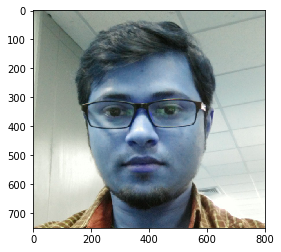

In [60]:
cr = image[500:1250, 100:900]
plt.imshow(cr)

## Face Mask

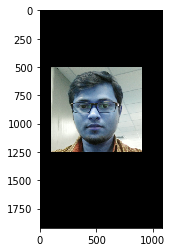

In [67]:
# When you dont care about centering the image

image_nw = image.copy()
image_nw[0:500,:] = 0
image_nw[1250:,:] = 0
image_nw[:,0:100] = 0
image_nw[:,900:] = 0
plt.imshow(image_nw)

In [ ]:
# When you care about centering the image
crpd = cr[350:810, 70:800]

In [51]:
mask = np.zeros(rot.shape) 
print (mask.shape)

(1920, 1080, 3)


In [52]:
# take the centerpoint
x,y = (int(image.shape[0]/2), int(image.shape[1]/2))
print(x, y)

960 540


In [57]:
cv2.rectangle(mask, (x-int((810-350)/2), y-int((800-70)/2)), (x+int((810-350)/2), y+int((800-70)/2)), 255,-1)
masked=cv2.bitwise_and(rot, rot,mask=mask)
plt.imshow(masked)

error: /opt/concourse/volumes/live/65bc8d8a-a7db-4b09-4d80-394825911c99/volume/opencv_1512681450376/work/modules/core/src/arithm.cpp:241: error: (-215) (mtype == 0 || mtype == 1) && _mask.sameSize(*psrc1) in function binary_op


## Image Operation

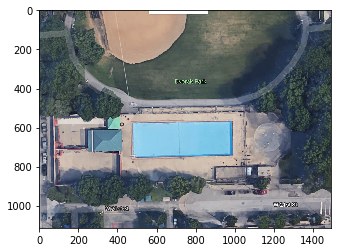

In [110]:
image2= cv2.imread("/Users/sam/All-Program/App-DataSet/ImageProcessing/image.jpg")
image= cv2.imread("/Users/sam/All-Program/App-DataSet/ImageProcessing/sam_1.jpg")
image_pool= cv2.imread("/Users/sam/All-Program/App-DataSet/ImageProcessing/pool.png")
image_pool_rgb = cv2.cvtColor(image_pool, cv2.COLOR_BGR2RGB)
plt.imshow(np.array(image_pool_rgb, dtype='uint8'))

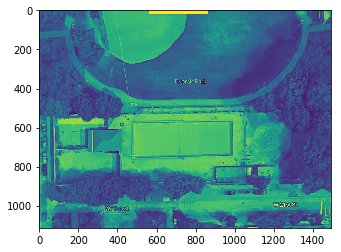

In [112]:
gray2 = cv2.cvtColor(image_pool_rgb, cv2.COLOR_RGB2GRAY)
plt.imshow(gray2)

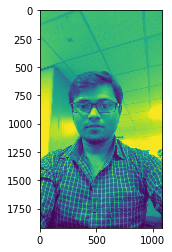

In [91]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

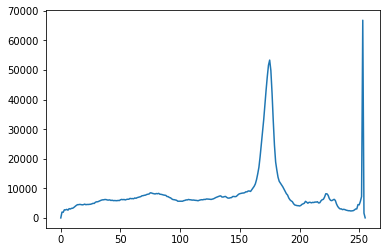

In [92]:
# See the histogram
hist=cv2.calcHist([gray], [0], None, [256], [0,256])
plt.plot(hist)

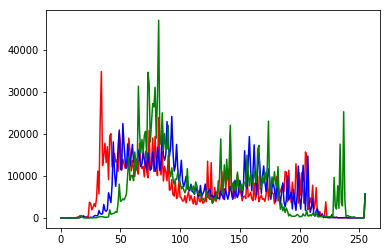

In [113]:
color = ['r','b', 'g']
channels = cv2.split(image_pool_rgb)
plt.figure()
for (col, chn) in zip(color, channels):
    hist = cv2.calcHist([chn], [0], None, [256], [0,256])
    plt.plot(hist, color=col)

### Mask and hostogram 

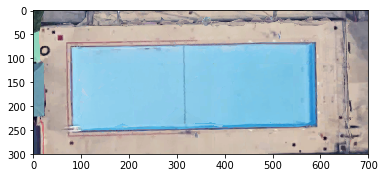

In [118]:
image_nw = image_pool_rgb[500:800, 400:1100]
plt.imshow(image_nw)

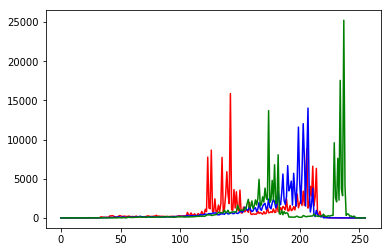

In [119]:
color = ['r','b', 'g']
channels = cv2.split(image_nw)
plt.figure()
for (col, chn) in zip(color, channels):
    hist = cv2.calcHist([chn], [0], None, [256], [0,256])
    plt.plot(hist, color=col)

## Divide the image into GRID, plot images and plot their Histogram

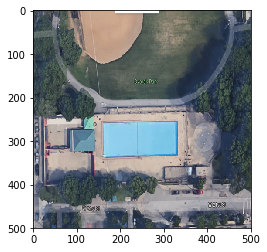

In [122]:
from scipy import misc
image_pool_rgb_rs = misc.imresize(image_pool_rgb, [500,500])
plt.imshow(image_pool_rgb_rs)

100


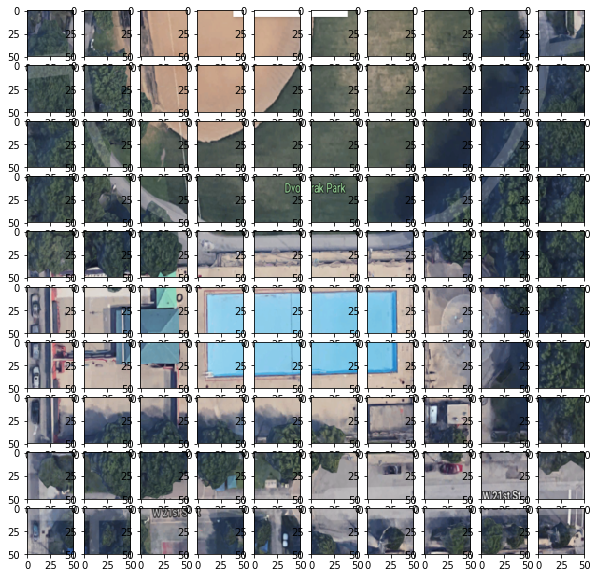

In [138]:
grid_h = 50
grid_w = 50
image_arr = []
for i in range(500//50):
    for j in range(500//50):
        image_arr.append(image_pool_rgb_rs[i*grid_h:(i*grid_h)+grid_h, j*grid_w:(j*grid_w)+grid_w])
print (len(image_arr))

fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(10,10))
axs = ax.ravel()
for i in range(0, len(image_arr)):
    axs[i].imshow(image_arr[i])

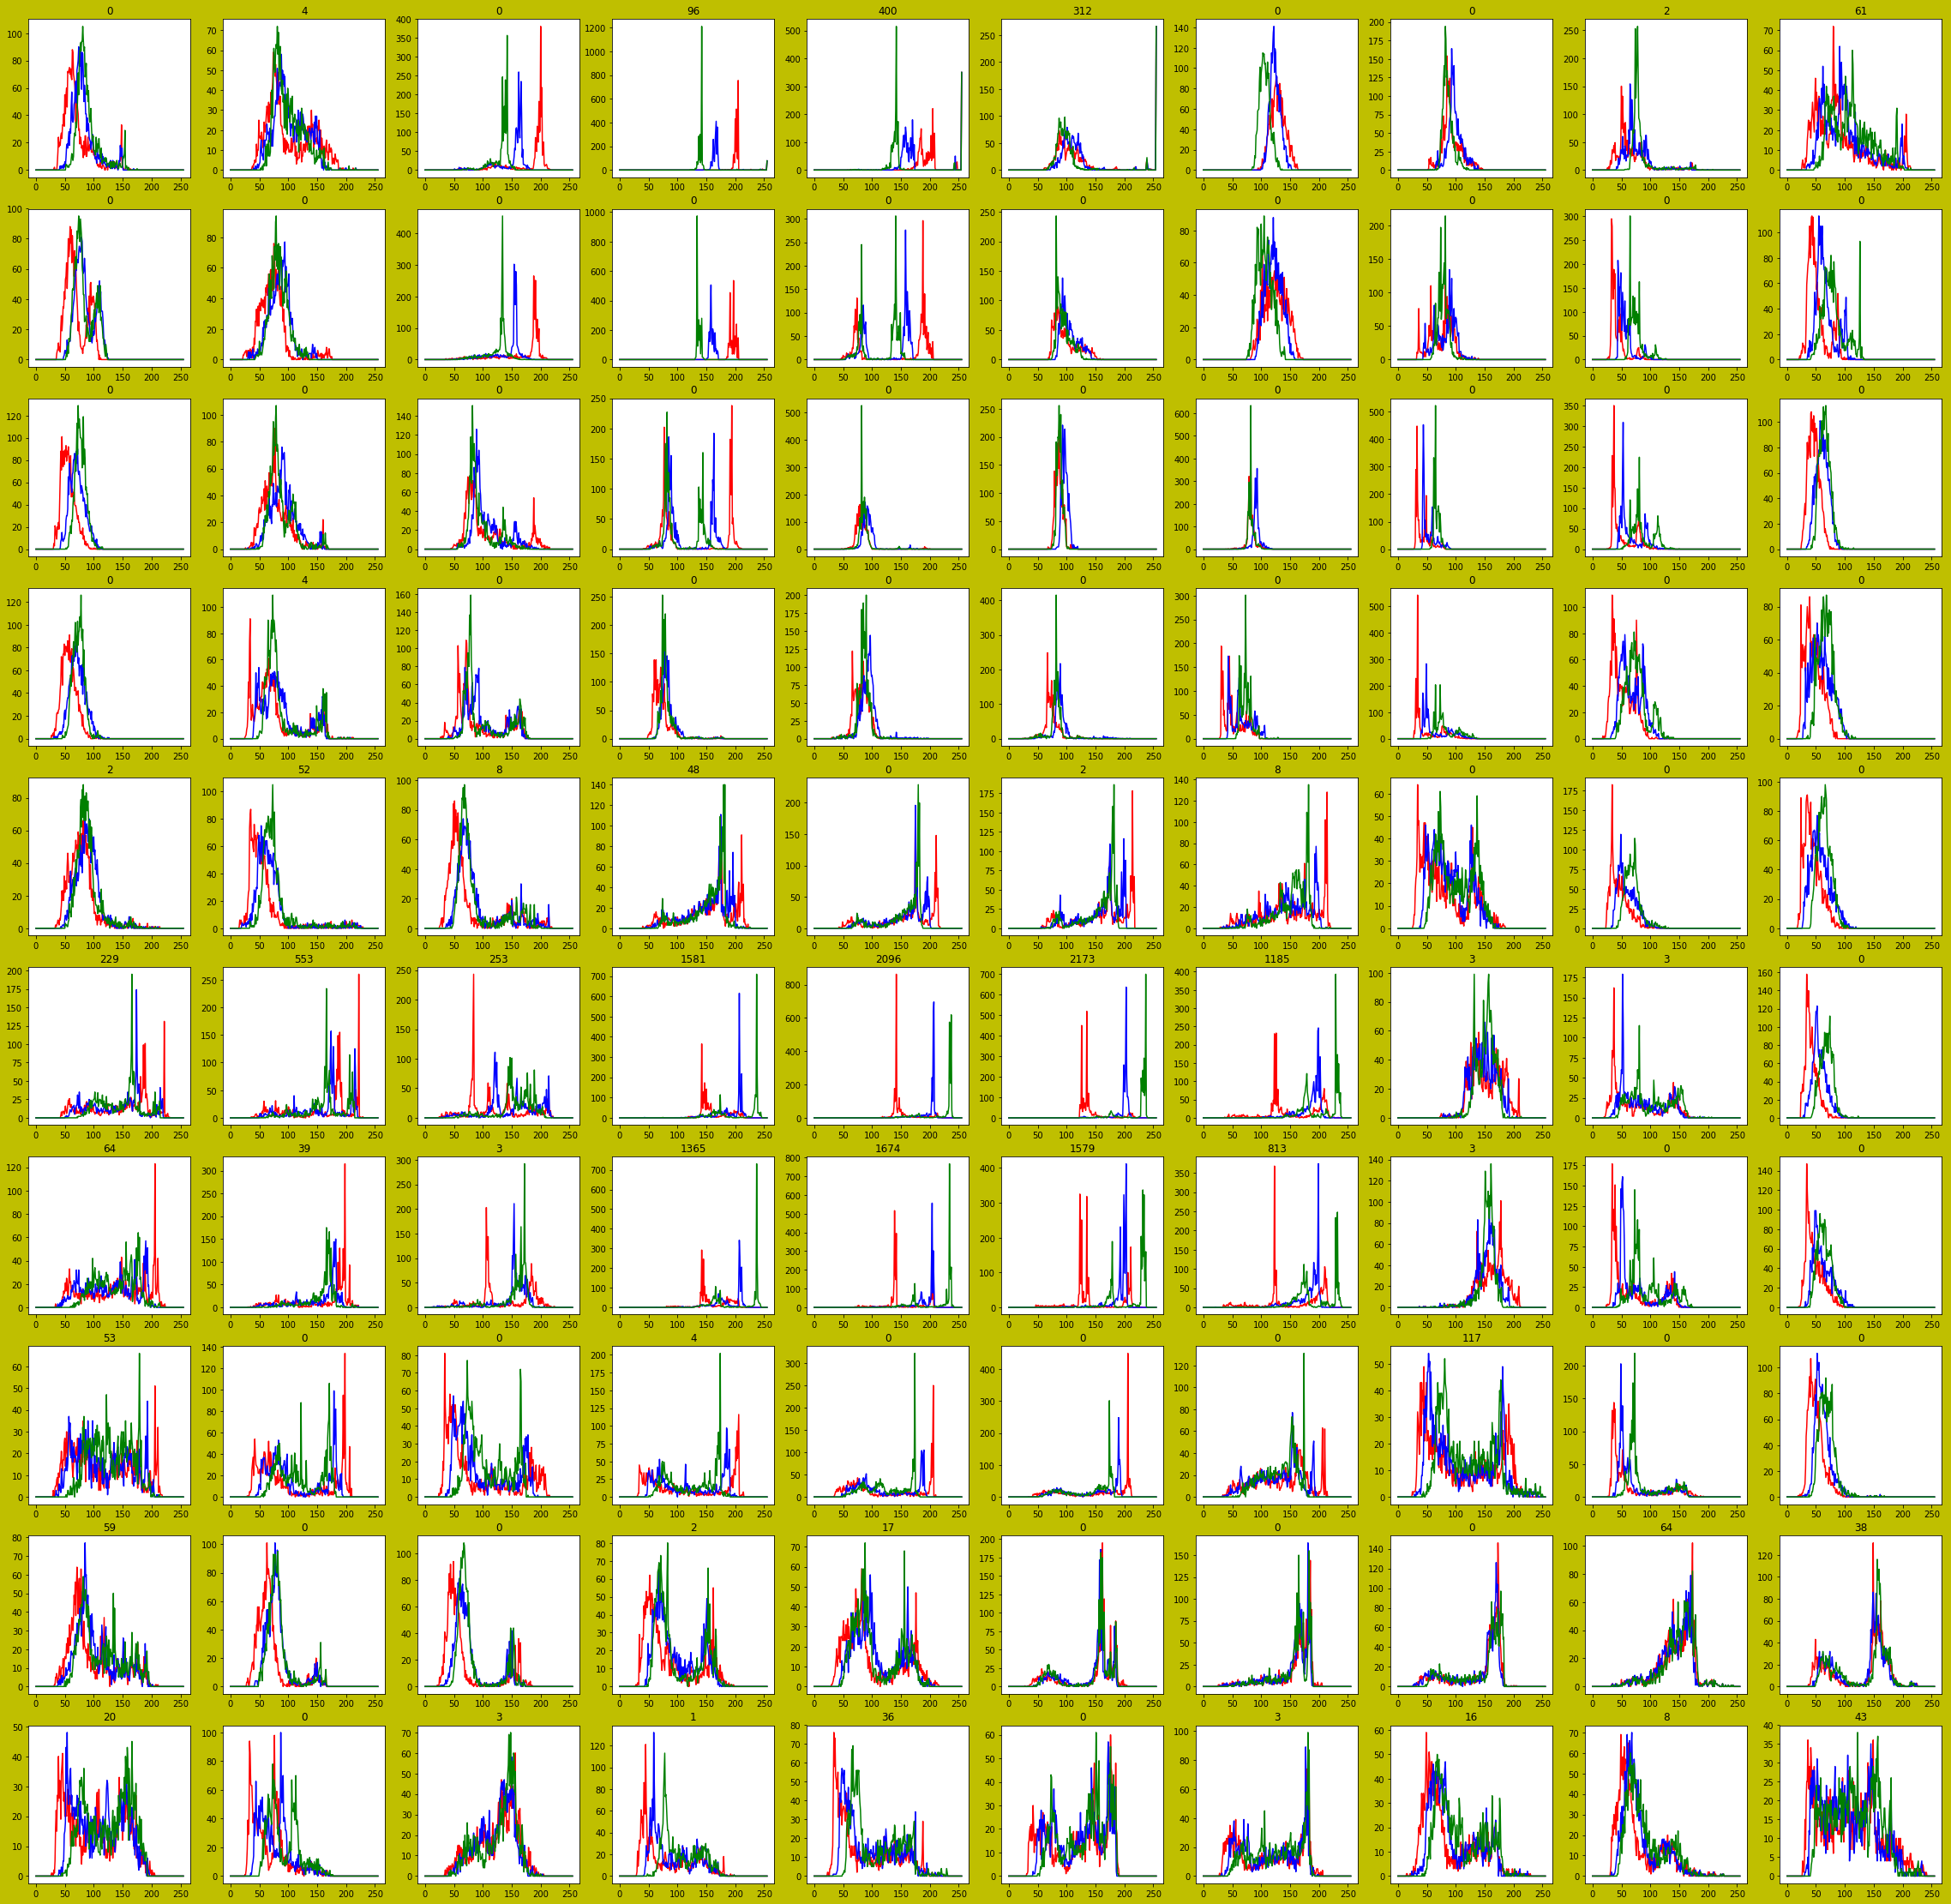

In [171]:
## HERE : we plot histograms of the blue, RED and Green color, and use a min max range for each color histogram distribution
## to be classified as Pool.

## Then we use a threshold of 1000, we say if atleast 100 pizels are retained after applying the min-max range, then classify
## the grid as a pool.

threshold = 800
pool_grid = []

fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(40,40), facecolor='y', edgecolor='k')
axs = ax.ravel()

for i in range(0, len(image_arr)):
    image_nw = image_arr[i]

    color = ['r','b', 'g']
#     color = ['b']
    channels = cv2.split(image_nw)
    for (col, chn) in zip(color, channels):
        hist = cv2.calcHist([chn], [0], None, [256], [0,256])
        axs[i].plot(hist, color=col)
        
    # We put a threshold on min max value of RBG and see how many pixels dont satisfy the condition
    BLUE_MIN = np.array([100,100,190], dtype='uint8')
    BLUE_MAX = np.array([255,255,255], dtype='uint8')
    # for i in 
    dst = cv2.inRange(image_nw, BLUE_MIN, BLUE_MAX)
    # print (sum(dst))#.shape)
    blue = cv2.countNonZero(dst)
    
    if blue >= threshold:
        pool_grid.append(i)
        
    axs[i].set_title(blue)

In [172]:
# Plot the grids:
pool_grid

[53, 54, 55, 56, 63, 64, 65, 66]

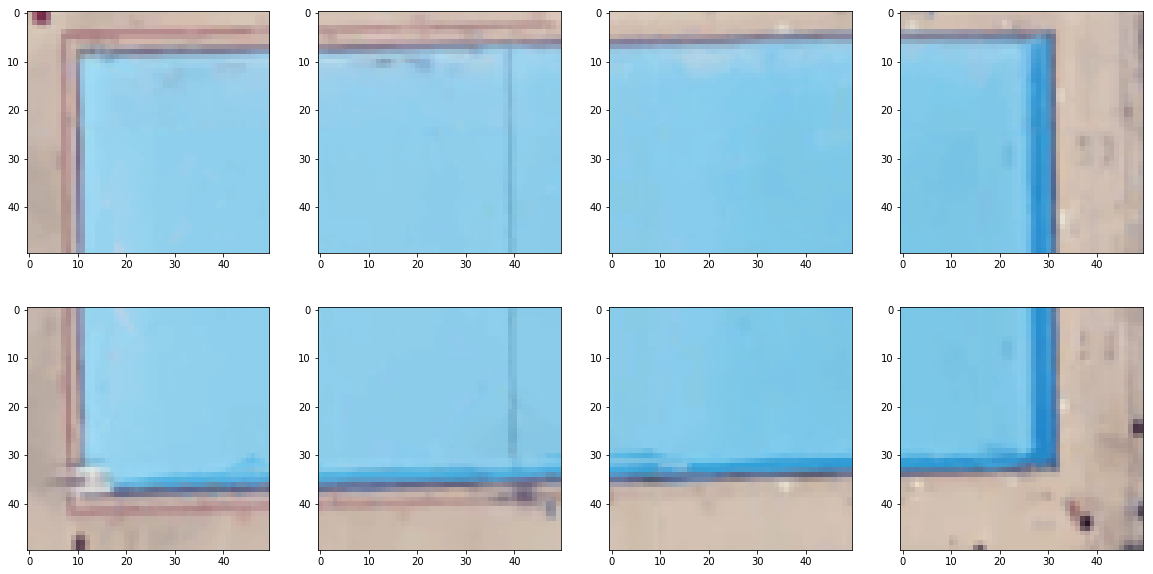

In [174]:
### POOL DETECTED
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(20,10))
axs = ax.ravel()
for i,j in enumerate(pool_grid):
    axs[i].imshow(image_arr[j])

## BLUR:

(1920, 1080, 3) (1920, 1080, 3) (1920, 1080, 3)


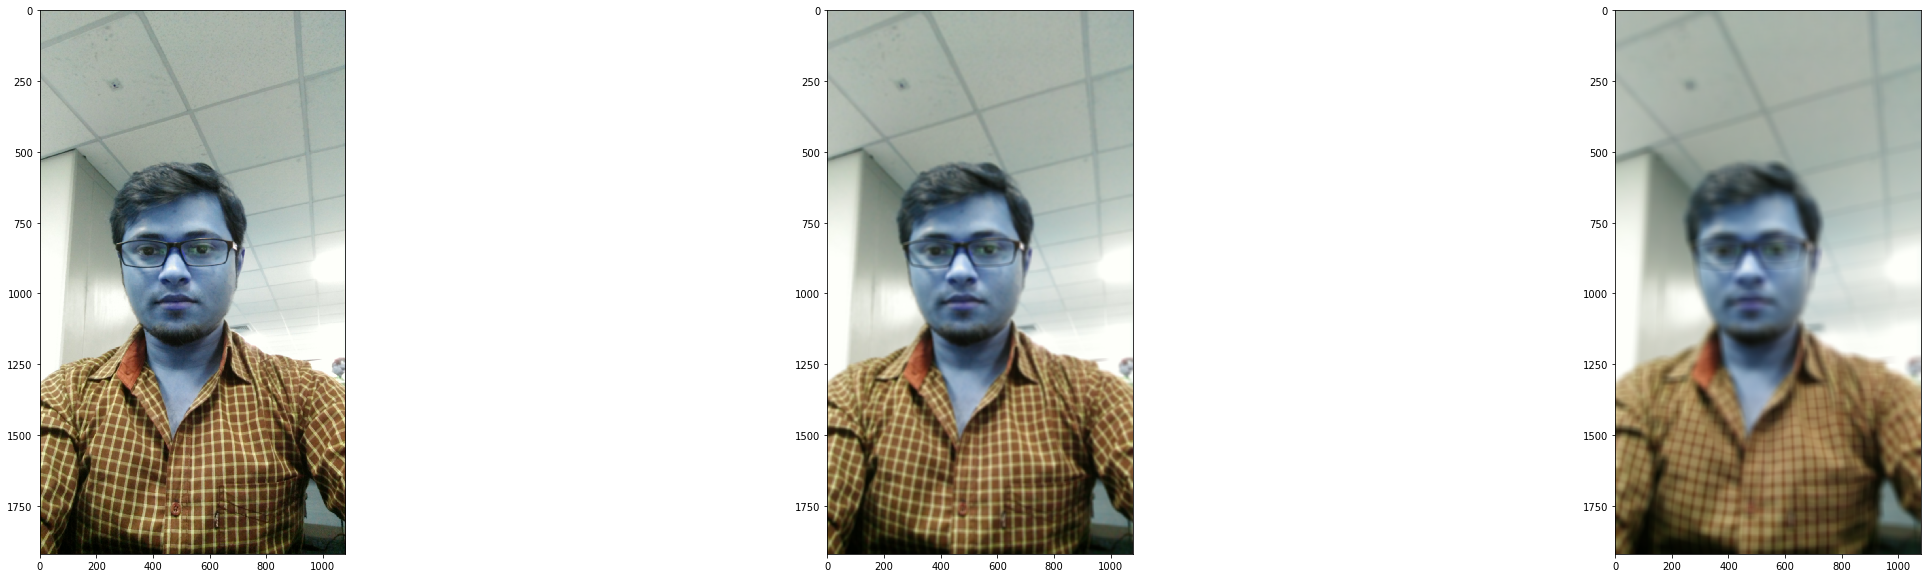

In [108]:
blur1 = cv2.blur(image, (3,3))
blur2 = cv2.blur(image, (11,11))
blur3 = cv2.blur(image, (27,27))
print (blur1.shape, blur2.shape, blur3.shape)
fig, ax = plt.subplots(nrows=1,ncols=3, figsize=(40,10))
ax = ax.ravel()
ax[0].imshow(blur1)
ax[1].imshow(blur2)
ax[2].imshow(blur3)

(1920, 1080, 3) (1920, 1080, 3) (1920, 1080, 3)


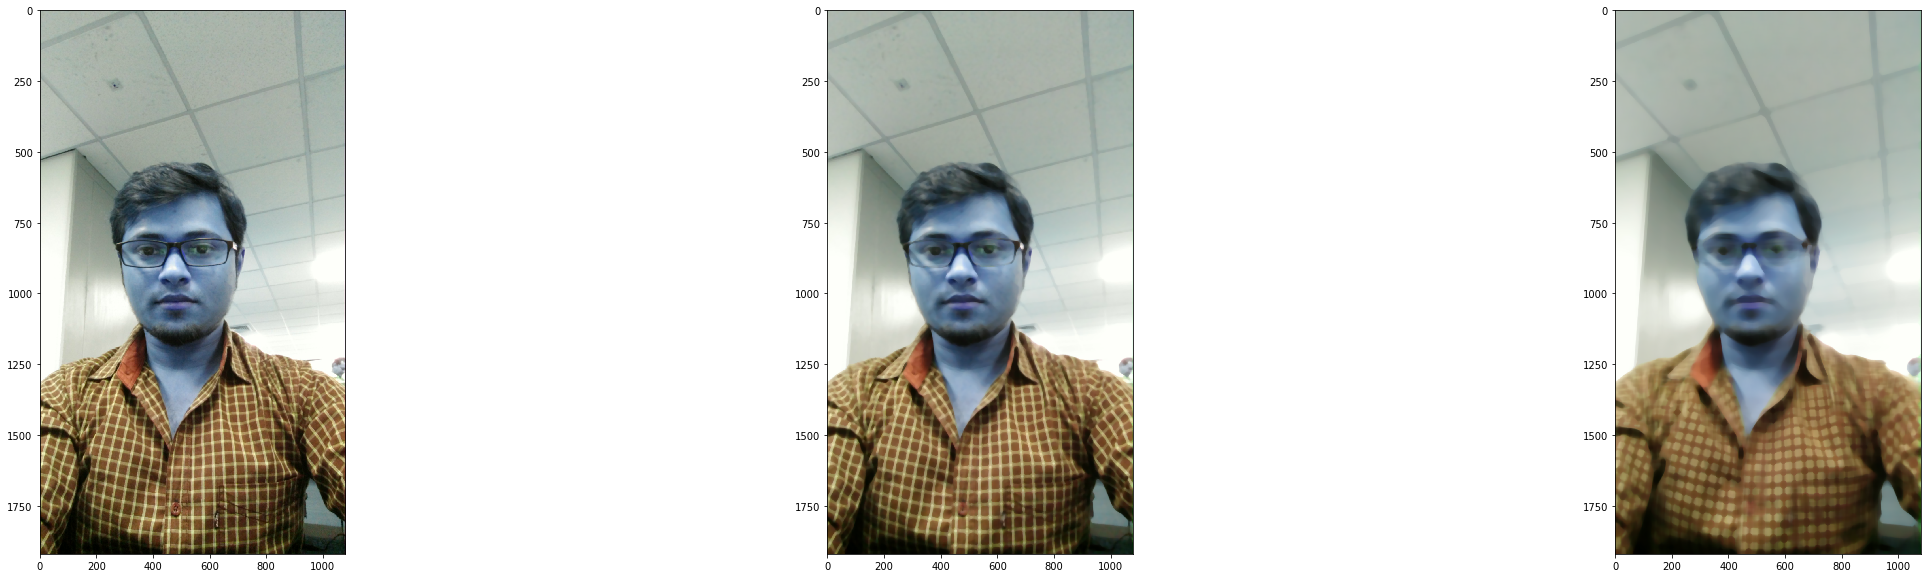

In [107]:
blur1 = cv2.medianBlur(image, 3)
blur2 = cv2.medianBlur(image, 11)
blur3 = cv2.medianBlur(image, 27)
print (blur1.shape, blur2.shape, blur3.shape)
fig, ax = plt.subplots(nrows=1,ncols=3, figsize=(40,10))
ax = ax.ravel()
ax[0].imshow(blur1)
ax[1].imshow(blur2)
ax[2].imshow(blur3)

## Create a simple net in Tensorflow

In [36]:
import tensorflow as tf
import numpy as np

tf.reset_default_graph()

def weight_init(shape):
    return tf.get_variable(dtype=tf.float32, 
                           shape=shape,
                           initializer=tf.truncated_normal_initializer(mean=0, stddev=0.01),
                           name='w')
def bais_init(shape):
    return tf.constant(1.0, shape=shape)

def computation_graph(image_shape, layers=[10,100,10,2]):
    xIN = tf.placeholder(dtype=tf.float32, shape=image_shape)
    yIN = tf.placeholder(dtype=tf.float32, shape=[image_shape[0], 2])
    
    x = tf.layers.flatten(xIN)

    with tf.variable_scope('layer1'):
        w = weight_init(shape=[x.get_shape().as_list()[-1], layers[0]])
        b = bais_init(shape=[layers[0]])
        x = tf.matmul(x,w) + b
    
    print (xIN.shape, yIN.shape, x.shape, w.shape, b.shape)
    
    with tf.variable_scope('layer2'):
        w = weight_init(shape=[x.get_shape().as_list()[-1], layers[1]])
        b = bais_init(shape=[layers[1]])
        x = tf.matmul(x,w) + b

    print (xIN.shape, yIN.shape, x.shape, w.shape, b.shape)
    
    with tf.variable_scope('layer3'):
        w = weight_init(shape=[x.get_shape().as_list()[-1], layers[2]])
        b = bais_init(shape=[layers[2]])
        x = tf.matmul(x,w) + b

    print (xIN.shape, yIN.shape, x.shape, w.shape, b.shape)
    
    with tf.variable_scope('softmax'):
        w = weight_init(shape=[x.get_shape().as_list()[-1], layers[3]])
        b = bais_init(shape=[layers[3]])
        logits = tf.matmul(x,w) + b
#         pred = tf.nn.sigmoid(logits)
        cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=yIN, name='sigmoid_cross_entropy')
        loss_CE = tf.reduce_mean(cross_entropy)
        
    with tf.name_scope('optimization'):
        optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0001).minimize(loss_CE)
        
    return dict(xIN=xIN, yIN=yIN, optimizer=optimizer, loss = loss_CE)


graph = computation_graph([100,32,32,3])

x_ = np.random.random((100,32,32,3))
y_ = np.array(np.append(np.ones(50), np.zeros(50)), dtype=int)
np.random.shuffle(y_)
max_val = np.max(y_) +1
y_ = np.eye(max_val)[y_]
print ('INput x.shape and y.shape: ', x_.shape, y_.shape)
    
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    feed_dict = {graph['xIN']: x_, graph['yIN']: y_}
    epochs = 50
    for epoch in range(0,epochs):
        lossCE, _ = sess.run([graph['loss'], graph['optimizer']], feed_dict = feed_dict)
        print(lossCE)

(100, 32, 32, 3) (100, 2) (100, 10) (3072, 10) (10,)
(100, 32, 32, 3) (100, 2) (100, 100) (10, 100) (100,)
(100, 32, 32, 3) (100, 2) (100, 10) (100, 10) (10,)
INput x.shape and y.shape:  (100, 32, 32, 3) (100, 2)
0.814884
0.814856
0.814828
0.814801
0.814773
0.814745
0.814717
0.814689
0.814661
0.814633
0.814605
0.814578
0.81455
0.814522
0.814494
0.814466
0.814438
0.814411
0.814383
0.814355
0.814327
0.814299
0.814272
0.814244
0.814216
0.814188
0.814161
0.814133
0.814105
0.814077
0.81405
0.814022
0.813994
0.813966
0.813939
0.813911
0.813883
0.813856
0.813828
0.8138
0.813772
0.813745
0.813717
0.813689
0.813662
0.813634
0.813607
0.813579
0.813551
0.813524


## BUILD a CONV NET

In [58]:
import tensorflow as tf
import numpy as np

tf.reset_default_graph()
def weight_init(shape):
    return tf.get_variable(shape=shape, 
                        initializer=tf.truncated_normal_initializer(mean=0, stddev=0.01), 
                        name = 'w', dtype=tf.float32)

def bias_init(shape):
    return tf.get_variable(shape=shape, initializer=tf.constant_initializer(1.0), name='b', dtype=tf.float32)

def conv_layer(x, w_shape, s, p, scope):
    with tf.variable_scope(scope):
        w = weight_init(w_shape)
        b = bias_init(w_shape[-1])
        x = tf.nn.conv2d(x, w, strides=[1,s,s,1], padding=p) + b
    return x

def activation(x):
    return tf.nn.relu(x)

def model(img_shape):
    xIN = tf.placeholder(shape=img_shape, dtype=tf.float32)
    yIN = tf.placeholder(shape=[img_shape[0], 2], dtype=tf.float32)
    
    x = conv_layer(xIN, w_shape = [3, 3, xIN.get_shape().as_list()[-1], 28], 
                   s=1, p='SAME', scope='conv_1')
    x = activation(x)
    print (x.shape)
    
    x = conv_layer(x, w_shape = [3, 3, x.get_shape().as_list()[-1], 12], 
                   s=1, p='SAME', scope='conv_2')
    x = activation(x)
    print (x.shape)
    x = tf.layers.max_pooling2d(x, pool_size=3, strides=3)
    print (x.shape)
    
    
    x = conv_layer(x, w_shape = [3, 3, x.get_shape().as_list()[-1], 12], 
                   s=2, p='SAME', scope='conv_3')
    x = activation(x)
    print (x.shape)
    
    x = tf.pad(x, paddings=[[0, 0], [1,0], [1,0], [0, 0]])
    print (x.shape)
    
    x = conv_layer(x, w_shape = [3, 3, x.get_shape().as_list()[-1], 12], 
                   s=2, p='SAME', scope='conv_4')
    x = activation(x)
    print (x.shape)
    
    x = tf.pad(x, paddings=[[0, 0], [1,0], [1,0], [0, 0]])
    print (x.shape)
    
    x = conv_layer(x, w_shape = [3, 3, x.get_shape().as_list()[-1], 12], 
                   s=2, p='SAME', scope='conv_5')
    x = activation(x)
    print (x.shape)
    
    x = conv_layer(x, w_shape = [3, 3, x.get_shape().as_list()[-1], 2], 
                   s=2, p='SAME', scope='conv_6')
    x = tf.layers.flatten(x)
    print (x.shape)
    
    with tf.variable_scope('softmax'):
        pred = tf.nn.sigmoid_cross_entropy_with_logits(logits=x, labels=yIN)
    
    with tf.variable_scope('loss'):
        ls = tf.reduce_mean(pred)
    
    with tf.variable_scope('optimization'):
        opt = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(ls)
        
#     with tf.variable_scope('accuracy'):
#         acc = tf.metrics.accuracy()

    print (x.shape)
    return dict(xIN=xIN, yIN=yIN, loss=ls, optimizer=opt)
    
comp_graph = model([10,28,28,3])

X = np.random.random((10,28,28,3))
Y = np.array(np.append(np.ones(5), np.zeros(5)), dtype='int')
np.random.seed(334)
np.random.shuffle(Y)
val = int(max(Y)) + 1
Y = np.eye(val)[Y]

feed_dict = {comp_graph['xIN']:X, comp_graph['yIN']:Y}

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(0,10):
        _, loss = sess.run([comp_graph['optimizer'], comp_graph['loss']], feed_dict=feed_dict)
        print (loss)



(10, 28, 28, 28)
(10, 28, 28, 12)
(10, 9, 9, 12)
(10, 5, 5, 12)
(10, 6, 6, 12)
(10, 3, 3, 12)
(10, 4, 4, 12)
(10, 2, 2, 12)
(10, 2)
(10, 2)
0.811777
0.810486
0.809206
0.80794
0.806685
0.805442
0.804212
0.802993
0.801787
0.800592
